In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
# load data
df_tire = pd.read_csv('Ch02 treadwear2.csv',
                      usecols = ['ID Number', 'Position on Automobile', 
                                 'Life of Tire (Months)', 'Tread Depth', 'Miles'])
# drop the rows with all Nan values
df_tire.dropna(how = 'all', inplace = True)
df_tire

,ID Number,Position on Automobile,Life of Tire (Months),Tread Depth,Miles
0,13391487,LR,58.4,2.2,2805.0
1,21678308,LR,17.3,8.3,39371.0
2,18414311,RR,16.5,8.6,13367.0
3,19778103,RR,8.2,9.8,1931.0
4,16355454,RR,13.7,8.9,23992.0
...,...,...,...,...,...
451,17221343,LR,19.7,8.1,19572.0
452,9857663,LF,21.6,7.1,5293.0
453,2122934,LF,11.1,9.3,21000.0
454,9937888,LR,30.4,6.5,57032.0


In [14]:
# impute the 75th percentile of the Life of Tire (Months)
pct = np.percentile(df_tire['Life of Tire (Months)'], 75)
print(pct)

# impute the 1st quartile of the Life of Tire (Months)
qtl = np.percentile(df_tire['Life of Tire (Months)'], 25)
print(qtl)

# impute the zscore
from scipy import stats
stats.zscore(df_tire['Life of Tire (Months)'])

30.4
10.3


array([ 1.08933548, -0.20323485, -0.22839437, -0.48942438, -0.31645269,
        0.91321884, -0.28500329, -0.55232318,  1.14279946, -0.37935149,
       -0.40451101, -0.50514908, -0.20952473, -0.50514908,  1.42269911,
       -0.13404617, -0.05856761, -0.49256932,  0.02005589,  0.06722999,
       -0.18751015,  0.25592639, -0.32903245, -0.07743725, -0.16864051,
       -0.34161221, -0.69070054, -0.20952473,  0.66791352,  0.25592639,
       -0.41709077, -0.42338065, -0.50514908, -0.28500329, -0.43281547,
       -0.25984377, -0.32903245,  1.42269911, -0.66239608, -0.6089321 ,
       -0.09001701, -0.42338065,  0.41946326, -0.35733691, -0.59006246,
        0.16786807,  0.6899281 , -0.6403815 , -0.42338065, -0.19380003,
        0.20246241, -0.66239608, -0.6089321 , -0.43910535, -0.38249643,
        0.02005589,  0.02005589, -0.68126572, -0.34161221, -0.36677173,
        0.19931747, -0.61522198, -0.47684463, -0.59006246, -0.31645269,
       -0.21895955, -0.62780174, -0.39193125,  0.49808676, -0.24

/Users/kaidiwang/.pyenv/versions/3.7.4/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


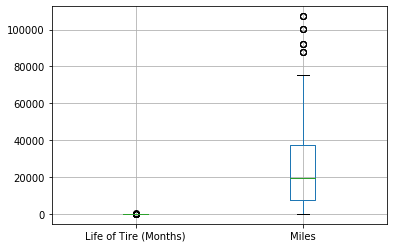

In [17]:
# plot boxplot
df_tire.boxplot(column = ['Life of Tire (Months)', 'Miles'])

# Fill missing values in Blakely Tire data

In [20]:
# get count of Nan values for each column
df_tire.isnull().sum()

ID Number                 0
Position on Automobile    0
Life of Tire (Months)     0
Tread Depth               0
Miles                     1
dtype: int64

In [23]:
# examine the record with Nan values
df_tire.loc[df_tire['Miles'].isnull()]

,ID Number,Position on Automobile,Life of Tire (Months),Tread Depth,Miles
27,3354942,LF,17.1,8.5,NaN


In [25]:
# find information of other tires on the vehicle
df_tire.loc[df_tire['ID Number'] == 3354942]

,ID Number,Position on Automobile,Life of Tire (Months),Tread Depth,Miles
27,3354942,LF,17.1,8.5,NaN
133,3354942,RF,21.4,7.7,33254.0
178,3354942,RR,21.4,7.8,33254.0
276,3354942,LR,21.4,7.7,33254.0


# Identify outliers

In [19]:
# describe the dataset
df_tire.describe()

,ID Number,Life of Tire (Months),Tread Depth,Miles
count,4.560000e+02,456.000000,456.000000,455.000000
mean,1.128225e+07,23.762281,7.640789,25440.215385
std,6.129054e+06,31.832032,2.505844,23600.209480
min,8.044100e+04,1.800000,0.000000,206.000000
25%,6.559652e+06,10.300000,6.400000,7299.000000
50%,1.126800e+07,17.200000,8.400000,19237.000000
75%,1.628981e+07,30.400000,9.500000,37419.000000
max,2.181757e+07,601.000000,16.700000,107237.000000


The mean and standard deviation for life of tire, tread depth, and miles are reasonable. But the maximum of life of tire if not reasonable.

In [33]:
# find the vehicle where life of tire is 601 months.
veh_id = df_tire.loc[df_tire['Life of Tire (Months)'] == 601, 'ID Number']
print(veh_id, type(veh_id))
veh_id = veh_id.tolist()[0]
df_tire.loc[df_tire['ID Number'] == veh_id]

446    8696859
Name: ID Number, dtype: int64 <class 'pandas.core.series.Series'>


,ID Number,Position on Automobile,Life of Tire (Months),Tread Depth,Miles
8,8696859,LF,60.1,2.0,26129.0
167,8696859,RF,60.1,2.0,26129.0
432,8696859,RR,60.1,2.0,26129.0
446,8696859,LR,601.0,2.0,26129.0


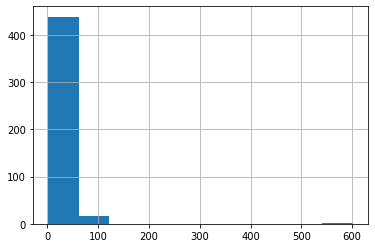

In [34]:
# any other abnormal life of tire?
df_tire['Life of Tire (Months)'].hist()

In [37]:
# find records with life of tire longer than 100 months
df_tire[df_tire['Life of Tire (Months)'] > 100]

,ID Number,Position on Automobile,Life of Tire (Months),Tread Depth,Miles
338,2122934,LR,111.0,9.3,21000.0
446,8696859,LR,601.0,2.0,26129.0


In [38]:
df_tire[df_tire['ID Number'] == 2122934]

,ID Number,Position on Automobile,Life of Tire (Months),Tread Depth,Miles
93,2122934,RF,11.1,9.4,21000.0
169,2122934,RR,11.1,9.3,21000.0
338,2122934,LR,111.0,9.3,21000.0
453,2122934,LF,11.1,9.3,21000.0


In [40]:
# correct the two errors with wrong life of tire
df_tire.loc[df_tire['ID Number'] == 2122934, 'Life of Tire (Months)'] = 11.1
df_tire.loc[df_tire['ID Number'] == 8696859, 'Life of Tire (Months)'] = 60.1
df_tire.loc[df_tire['ID Number'].isin([2122934, 8696859])]

,ID Number,Position on Automobile,Life of Tire (Months),Tread Depth,Miles
8,8696859,LF,60.1,2.0,26129.0
93,2122934,RF,11.1,9.4,21000.0
167,8696859,RF,60.1,2.0,26129.0
169,2122934,RR,11.1,9.3,21000.0
338,2122934,LR,11.1,9.3,21000.0
432,8696859,RR,60.1,2.0,26129.0
446,8696859,LR,60.1,2.0,26129.0
453,2122934,LF,11.1,9.3,21000.0


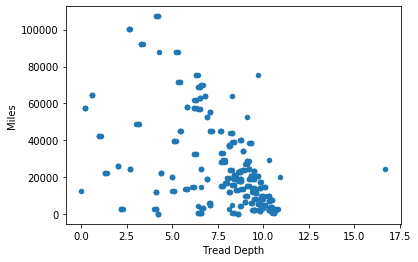

In [42]:
df_tire.plot.scatter(x = 'Tread Depth', y = 'Miles')